Chapter 03

# 抛硬币
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码模拟了重复投掷10次硬币的实验，并统计在每组投掷结果中“正面”出现次数为6次以及至少为6次的概率，随着投掷组数增加的变化。具体步骤如下：

1. 首先生成一个包含硬币投掷结果的矩阵 `toss_results`，每个元素为0或1，表示硬币的两种结果（例如0为反面，1为正面），大小为 \( \text{num\_toss} \times \text{toss\_times} \)，其中 `num_toss` 表示投掷的组数，每组包含 `toss_times = 10` 次投掷：
   $$ \text{toss\_results} = \text{np.random.randint}(0, 2, \text{size} = (\text{num\_toss}, \text{toss\_times})) $$

2. 计算每组投掷结果中“正面”出现的总次数，并判断出现次数是否等于或至少为6次：
   - 计算每组正面次数总和：
     $$ \text{sum\_results} = \text{np.sum}(\text{toss\_results}, \text{axis} = 1) $$
   - 判断每组投掷结果中正面次数是否等于6：
     $$ \text{result\_exact\_6} = (\text{sum\_results} == 6) $$
   - 判断每组投掷结果中正面次数是否至少为6：
     $$ \text{result\_at\_least\_6} = (\text{sum\_results} \geq 6) $$

3. 统计投掷组数逐渐增加时，正面次数等于或至少为6次的累计概率。通过累积计算每种情况下出现的次数并除以总组数，得到相应的概率：
   - 累计正面次数等于6的概率：
     $$ \text{count\_6} = \text{np.cumsum}(\text{result\_exact\_6}) $$
     $$ \text{prob\_count\_6} = \frac{\text{count\_6}}{\text{num\_toss\_array}} $$
   - 累计正面次数至少为6的概率：
     $$ \text{count\_6\_at\_least} = \text{np.cumsum}(\text{result\_at\_least\_6}) $$
     $$ \text{prob\_count\_6\_at\_least} = \frac{\text{count\_6\_at\_least}}{\text{num\_toss\_array}} $$

4. 最后，代码使用对数坐标系分别绘制正面次数等于6和至少为6的概率随投掷组数增加的收敛曲线，便于观察概率的变化趋势。


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## 设置投掷组数和每组投掷次数

In [2]:
num_toss = 10000 # 总投掷组数设为10000
toss_times = 10 # 每组投掷次数设为10

In [3]:
toss_results = np.random.randint(0, 2, size=(num_toss, toss_times)) # 生成每组投掷结果的矩阵

In [4]:
sum_results = np.sum(toss_results, axis=1); # 计算每组正面出现的总次数

In [5]:
result_exact_6 = (sum_results == 6); # 判断每组中正面次数是否等于6

In [6]:
result_at_least_6 = (sum_results >= 6); # 判断每组中正面次数是否至少为6

In [7]:
num_toss_array = np.arange(1, num_toss + 1) # 生成投掷组数数组

In [8]:
count_6 = np.cumsum(result_exact_6); # 累计计算正面次数等于6的组数
count_6_at_least = np.cumsum(result_at_least_6); # 累计计算正面次数至少为6的组数

In [9]:
prob_count_6 = count_6 / num_toss_array; # 计算每次投掷后正面次数等于6的概率
prob_count_6_at_least = count_6_at_least / num_toss_array; # 计算每次投掷后正面次数至少为6的概率

## 可视化

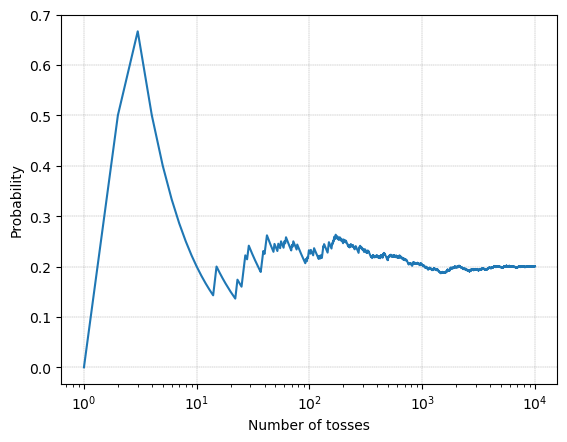

In [10]:
fig, ax = plt.subplots()
plt.plot(num_toss_array, prob_count_6) # 绘制投掷组数与正面次数等于6的概率曲线

ax.set_xscale('log') # 设置x轴为对数坐标
plt.xlabel('Number of tosses'); # 设置x轴标签
plt.ylabel('Probability') # 设置y轴标签
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5]) # 设置网格线样式

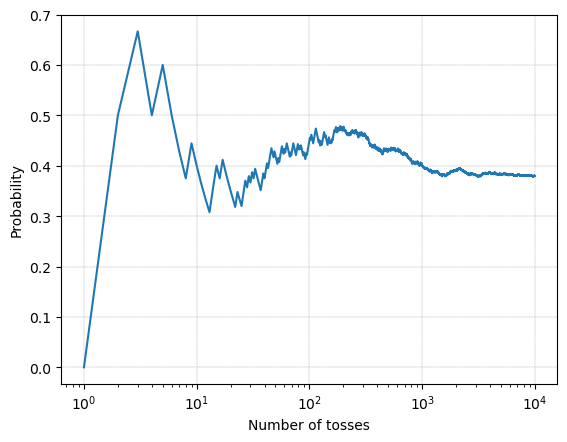

In [11]:
fig, ax = plt.subplots()
plt.plot(num_toss_array, prob_count_6_at_least) # 绘制投掷组数与正面次数至少为6的概率曲线

ax.set_xscale('log') # 设置x轴为对数坐标
plt.xlabel('Number of tosses'); # 设置x轴标签
plt.ylabel('Probability') # 设置y轴标签
ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5]) # 设置网格线样式